# 輸入套件

In [1]:
# 自製模組套件
from preprocess import Data
from backtest import Backtest

# 外部套件
import os
from operators import lag

# 輸入資料

In [2]:
# 檢視可使用資料
os.listdir('data')

['benchmark.csv',
 'close_price.csv',
 'market_size.csv',
 'open_price.csv',
 'vol.csv',
 '單月合併營收創N個月新高_已格式化.csv',
 '單月合併營收年成長(%)連N個月大於零_已格式化.csv',
 '單月合併營收連N個月遞增_已格式化.csv',
 '單月營收年成長(%)_已格式化.csv',
 '收盤價_未還原_已格式化.csv',
 '累計合併營收成長(%)連N個月大於零_已格式化.csv']

In [3]:
# 建立Data物件
vol = Data(
    data_name='vol',
    data_frequency='day',
    market_size_threshold=200
)

close_price = Data(
    data_name='收盤價_未還原_已格式化',
    data_frequency='day',
    market_size_select_rank='top',
    market_size_threshold=200
)

# 定義篩選條件、計算公式

In [4]:
from operators import lag

def calculate_days_60_return(series):
    '''
    計算近250日報酬
    '''
    return (
        series / lag(series, 250) -1
    )

def bigger_than_threshold(series):
    '''
    回傳大於等於0.2者
    '''
    return series >= 0.2

# 加入濾網、篩選條件、計算自定義數值分析
範例策略：每月最後一日衡量，波動度最低30%者，且近250日報酬大於0.2。

In [5]:
vol.mutate_data(
    None, 
    rebalance_frequency='month',
    date_order_ascending=False,
    measure_on_nth_date=1
)

close_price.mutate_data(
    calculate_days_60_return,
    rebalance_frequency='month',
    date_order_ascending=False,
    measure_on_nth_date=1
)

vol.select(rank='bottom', ratio=0.3)
close_price.add_filter(bigger_than_threshold)

出場衡量 - '每月最後1個交易日進行再平衡衡量(於下一個交易日出場)' 已指定!
 
資料修改 - '收盤價_未還原_已格式化' 已完成!
出場衡量 - '每月最後1個交易日進行再平衡衡量(於下一個交易日出場)' 已指定!
 
市值資料可能需要更新！
Error: Timestamp('2019-07-31 00:00:00')
 
市值條件 - '200億以上' 門檻已選擇！
 
vol - 'bottom 0.3' 比例已選擇!

篩選條件 - 'bigger_than_threshold' 已新增!
市值資料可能需要更新！
Error: Timestamp('2019-07-31 00:00:00')
 
市值條件 - '200億以上' 門檻已選擇！
 


# 開始回測

In [6]:
signal_list = [
    vol, close_price 
]

backtesting = Backtest(
    signal_list,
    start_date='2010/1/1',
    end_date='2019/6/30',
    long_or_short='long'
)
backtesting.run()

Progress: 100% |#######################| Elapsed Time: 0:00:03 , Time: 0:00:03 


# 分析結果

In [7]:
from analysis import Analysis

backtesting_result = Analysis(backtesting)
backtesting_result.run()

Progress: 100% |#######################| Elapsed Time: 0:00:13 , Time: 0:00:13 


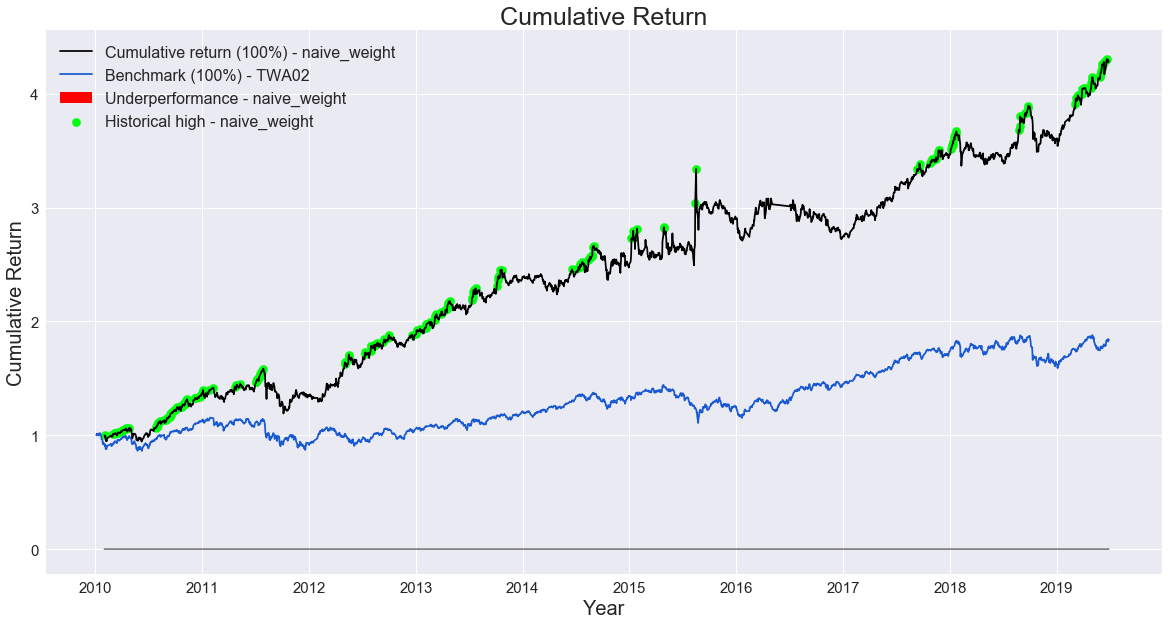

In [8]:
backtesting_result.plot_cumulative_return(weight_method='naive_weight')

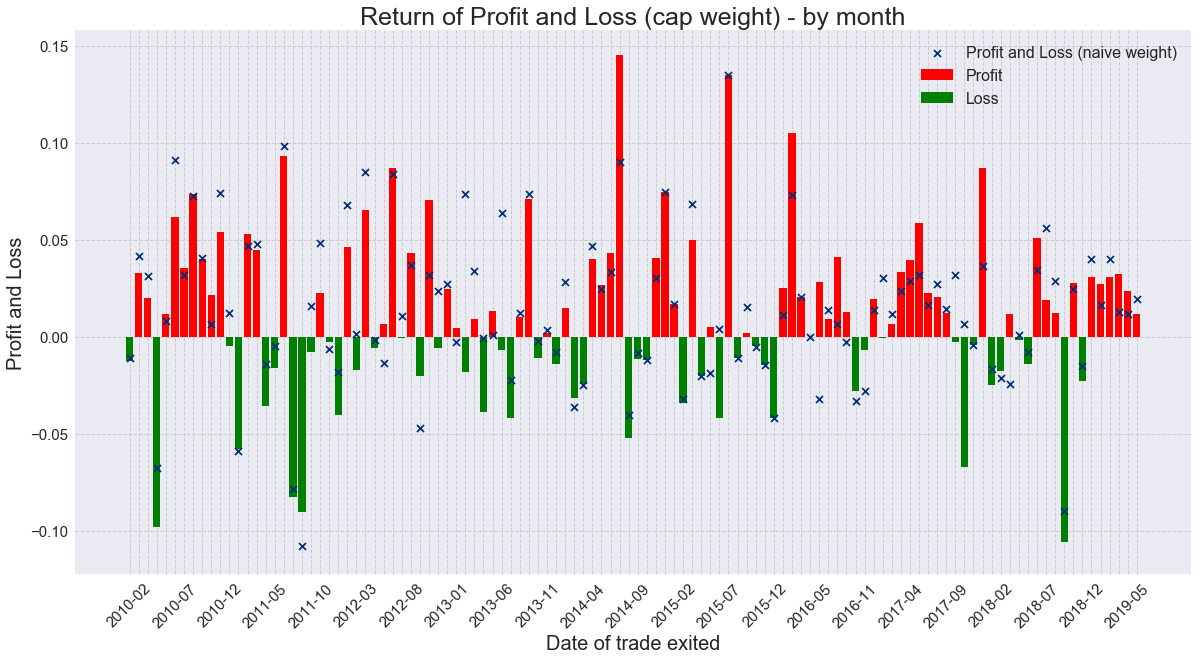

In [9]:
backtesting_result.plot_profit_and_loss(weight_method='cap_weight', frequency='month')

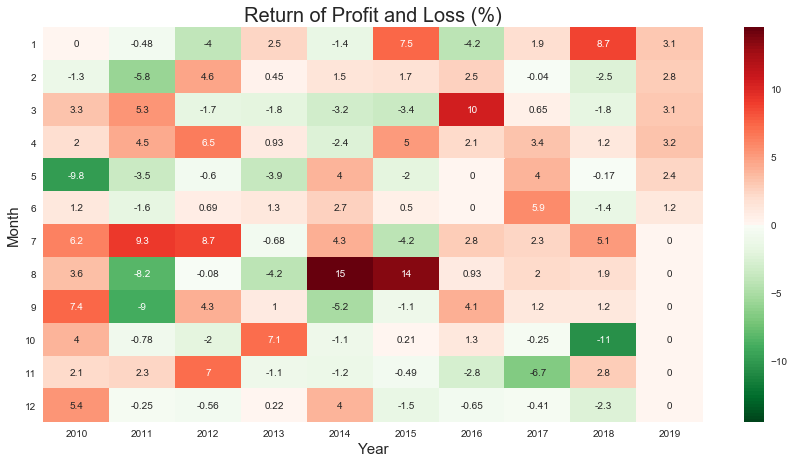

In [10]:
backtesting_result.plot_return_heatmap(weight_method='cap_weight')

In [11]:
backtesting_result.summary()

=========================================  ===========  ==============  ============
Backtesting result                         Benchmark    Naive weight    Cap weight
=========================================  ===========  ==============  ============
Start date                                 2010/01/01   2010/01/01      2010/01/01
End date                                   2019/06/30   2019/06/30      2019/06/30
Duration (years)                           9.5          9.5             9.5
Total trade                                NA           899             899
Total entry times                          NA           114             114
Average trade number per entry             NA           7.89            7.89
Average holding days                       NA           30              30
Cumulative return                          83.67%       328.36%         205.47%
Annual return                              7.58%        17.42%          13.95%
CAGR                                      

# 若需要比較不同參數的策略績效，可以透過for loop代入不同參數同時儲存結果
基本作法就是將上面的過程重複執行，因為需要重新帶入不同參數

(以下為計算近250天報酬下，考量不同動能因子門檻)

In [12]:
# result = {}
# for return_ratio in  np.arange(0, 0.55, 0.05):
#     print('backtesting_resulting...{}'.format(return_ratio))
#     vol = Data(
#         data_name='vol',
#         data_frequency='day',
#         market_size_threshold=200
#     )

#     close_price = Data(
#         data_name='收盤價_未還原_已格式化',
#         data_frequency='day',
#         market_size_threshold=200
#     )

#     def n_days_return(series):
#         return (
#             series / lag(series, 250) -1
#         )

#     def bigger_than_5(series):
#         return series >= return_ratio
    
#     vol.mutate_data(
#         None, 
#         rebalance_frequency='month',
#         date_order_ascending=False,
#         measure_on_nth_date=1
#     )

#     close_price.mutate_data(
#         n_days_return,
#         rebalance_frequency='month',
#         date_order_ascending=False,
#         measure_on_nth_date=1
#     )

#     vol.select(rank='bottom', ratio=0.3)
#     close_price.add_filter(bigger_than_5)
    
#     signal_list = [
#         close_price, vol
#     ]
#     backbacktesting_resulting = Backbacktesting_result(
#         signal_list, start_date='2010/1/1', end_date='2019/6/30', long_or_short='long'
#     )
#     backbacktesting_resulting.run()
    
#     backtesting_result = Analysis(backbacktesting_resulting)
#     backtesting_result.run()
    
#     temp_result = backtesting_result.naive_weight_return[['holding_date', 'cumulative_return']]
    
#     result[return_ratio] = temp_result

# 接著整理結果並儲存，就可以進行後續分析

In [13]:
# date_key = pd.DataFrame(test.benchmark_data['holding_date']).reset_index(drop=True)
# for key in result.keys():
#     date_key = date_key.merge(result[key], on='holding_date', how='outer')
    
# date_key.index = date_key.holding_date
# date_key.drop(columns='holding_date', inplace=True)
# date_key.columns = np.arange(0, 0.55, 0.05)

# date_key.to_csv('250.csv')